In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df= pd.read_csv('./data/Train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35753 entries, 0 to 35752
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   year                         35753 non-null  int64  
 1   month                        35753 non-null  int64  
 2   region                       35753 non-null  object 
 3   district                     35753 non-null  object 
 4   site_code                    35753 non-null  object 
 5   product_code                 35753 non-null  object 
 6   stock_initial                35753 non-null  int64  
 7   stock_received               35753 non-null  int64  
 8   stock_distributed            35753 non-null  int64  
 9   stock_adjustment             35753 non-null  int64  
 10  stock_end                    35753 non-null  int64  
 11  average_monthly_consumption  35753 non-null  int64  
 12  stock_stockout_days          35753 non-null  int64  
 13  stock_ordered   

In [4]:
df.describe()

,year,month,stock_initial,stock_received,stock_distributed,stock_adjustment,stock_end,average_monthly_consumption,stock_stockout_days,stock_ordered
count,35753.000000,35753.000000,35753.000000,35753.000000,35753.000000,35753.000000,35753.000000,35753.000000,35753.0,34990.000000
mean,2017.433782,6.169412,63.245518,14.846055,14.764327,0.961150,64.288395,14.606439,0.0,26.658102
std,1.019933,3.429079,168.661538,70.631782,39.848242,37.883099,170.848479,32.521384,0.0,107.166082
min,2016.000000,1.000000,0.000000,0.000000,0.000000,-1440.000000,0.000000,0.000000,0.0,0.000000
25%,2017.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,2017.000000,6.000000,12.000000,0.000000,1.000000,0.000000,13.000000,3.000000,0.0,0.000000
75%,2018.000000,9.000000,69.000000,0.000000,13.000000,0.000000,70.000000,16.000000,0.0,20.000000
max,2019.000000,12.000000,4320.000000,3534.000000,1728.000000,3003.000000,4320.000000,864.000000,0.0,10240.000000


### Filling Nulls with Mean

In [5]:
df.fillna(round(df.mean()), inplace=True, axis=0)

In [6]:
df.iloc[436]

year                                               2019
month                                                 1
region                           ABIDJAN 1-GRANDS PONTS
district                       ADJAME-PLATEAU-ATTECOUBE
site_code                                         C1034
product_code                                    AS27134
stock_initial                                         0
stock_received                                        0
stock_distributed                                     0
stock_adjustment                                      0
stock_end                                             0
average_monthly_consumption                           9
stock_stockout_days                                   0
stock_ordered                                      27.0
Name: 436, dtype: object

### Creating a Time Feature from the Month and Year Feature

In [7]:
# Creating a date feature

df['date'] = pd.to_datetime(df[['year', 'month']].assign(DAY=28))

#### Inversing and Sorting the DataFrame to start with the smallest date

In [8]:
df = df[::-1]

In [9]:
df = df.sort_values(["year", "month"], ascending = (True, True))

#### Distribution of Stock Distributed

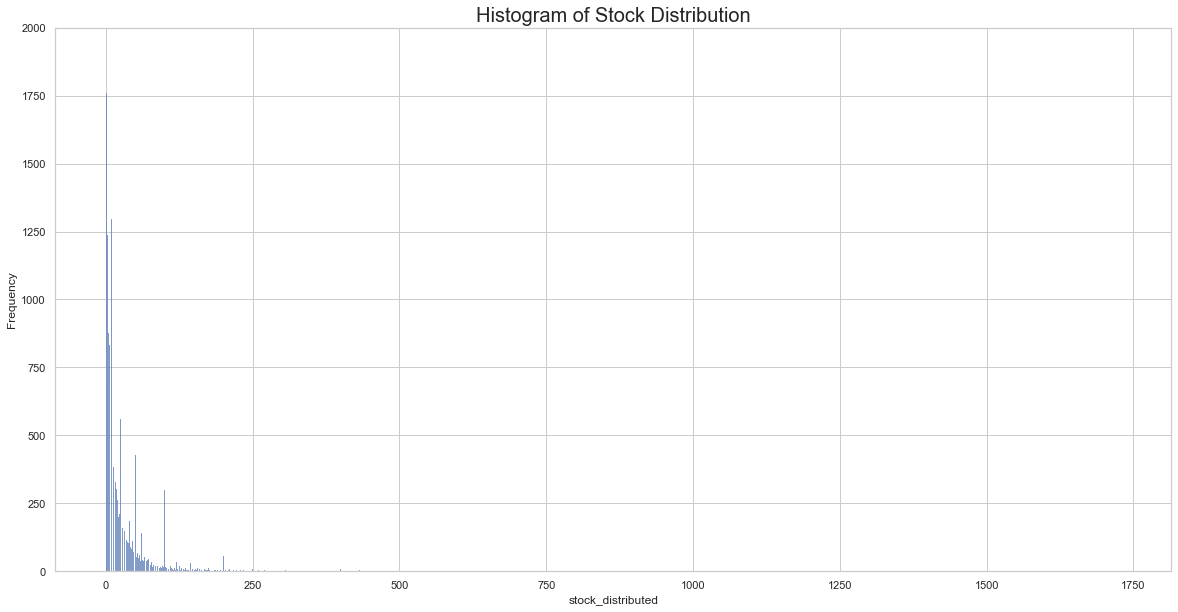

In [10]:
plt.figure(figsize=(20, 10))
sns.set_theme(style="whitegrid")
sns.histplot(data=df, x="stock_distributed", stat='frequency')
plt.ylim(0, 2000)
plt.title(
    'Histogram of Stock Distribution', fontsize=20)
plt.show()


Clearly, there are outliers and this informs the choice of using RMSE in measuring error

In [11]:
df.groupby(['date','month','site_code','product_code']).sum().reset_index().set_index('date')

,month,site_code,product_code,year,stock_initial,stock_received,stock_distributed,stock_adjustment,stock_end,average_monthly_consumption,stock_stockout_days,stock_ordered
date,,,,,,,,,,,,
2016-01-28,1,C1008,AS27000,2016,127,0,90,90,127,90,0,100.0
2016-01-28,1,C1008,AS27132,2016,15,0,15,0,0,15,0,0.0
2016-01-28,1,C1008,AS27133,2016,0,100,50,-50,0,50,0,0.0
2016-01-28,1,C1008,AS27134,2016,80,100,15,-85,80,15,0,0.0
2016-01-28,1,C1008,AS27137,2016,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-28,6,C5063,AS27138,2019,13,0,2,0,11,5,0,4.0
2019-06-28,6,C5063,AS46000,2019,85,0,12,0,73,4,0,0.0
2019-06-28,6,C5066,AS27133,2019,37,0,28,0,9,22,0,57.0


###  Top Averages of Site Contraceptive Consumption Across the Period(2016-2019)

In [12]:
df_rank_site_avg = df.groupby(['year', 'site_code']).mean().reset_index()[
    ['year', 'site_code', 'stock_distributed']].sort_values(['stock_distributed'], ascending=False)


In [13]:
df_rank_site_avg.describe()

,year,stock_distributed
count,583.000000,583.000000
mean,2017.555746,14.816789
std,1.115294,13.914502
min,2016.000000,0.000000
25%,2017.000000,5.743421
50%,2018.000000,10.920635
75%,2019.000000,19.170170
max,2019.000000,93.083333


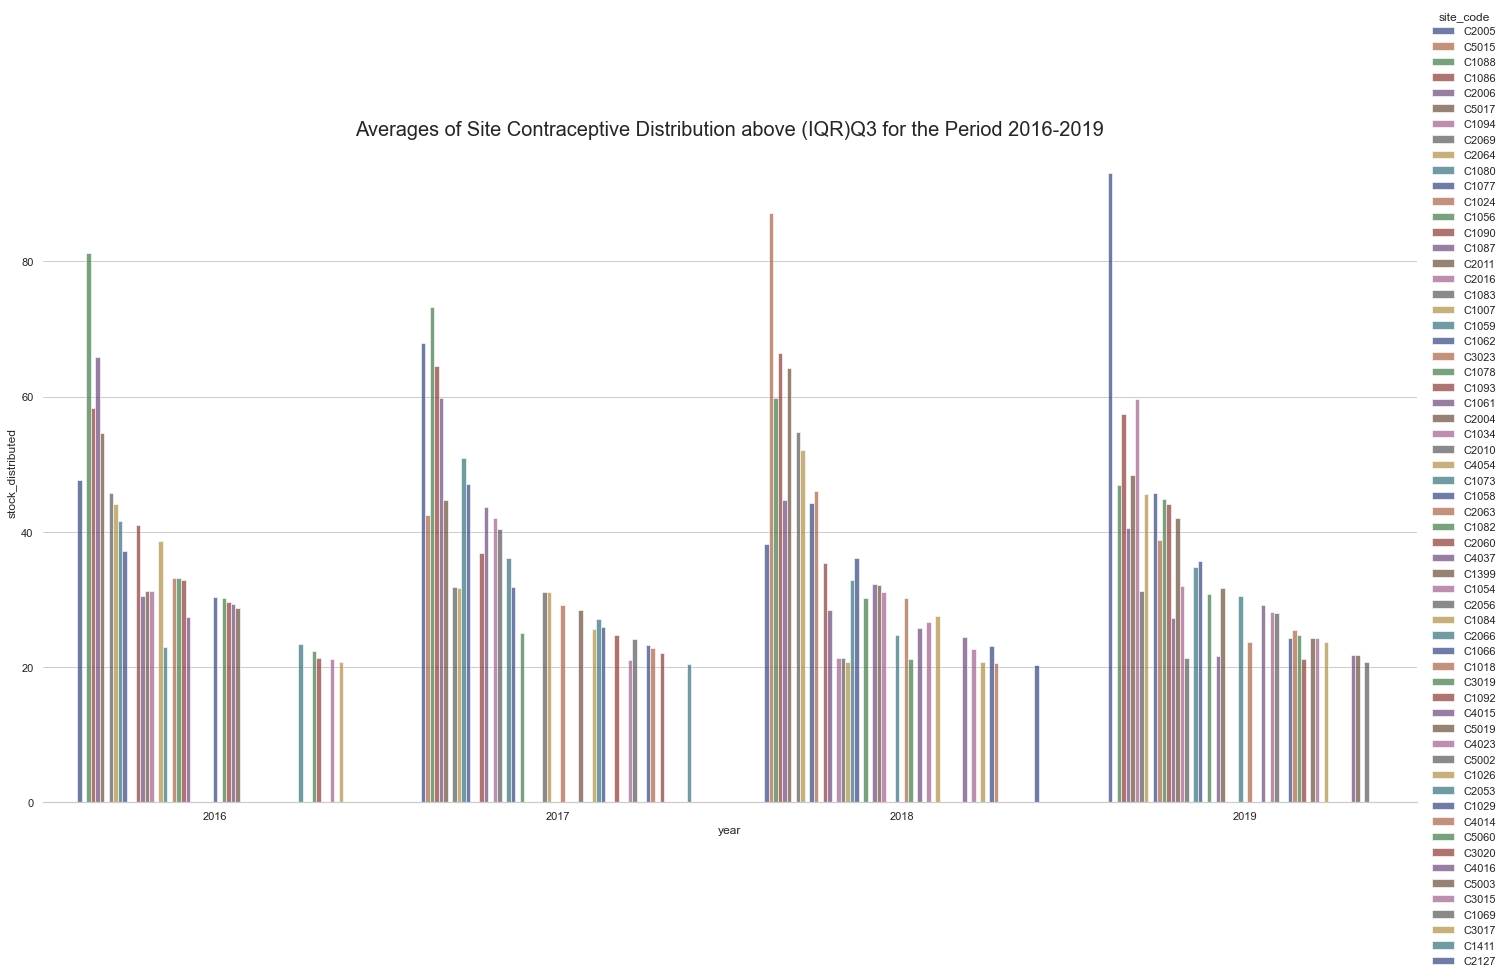

In [14]:
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=df_rank_site_avg[df_rank_site_avg['stock_distributed']
                              > 20], kind="bar",
    x="year", y="stock_distributed", hue="site_code",
    ci="sd", palette="dark", alpha=.6, height=10, aspect=2
)
g.despine(left=True)
plt.title(
    'Averages of Site Contraceptive Distribution above (IQR)Q3 for the Period 2016-2019', fontsize=20)
plt.show()


###  Top Averages of District Contraceptive Consumption Across the Period(2016-2019)

In [15]:
df_rank_district_avg = df.groupby(['year','district',]).mean().reset_index()[
    ['year', 'district', 'stock_distributed']].sort_values(['stock_distributed'], ascending=False)


In [16]:
df_rank_district_avg.describe()

,year,stock_distributed
count,315.000000,315.000000
mean,2017.523810,14.648553
std,1.112425,12.362179
min,2016.000000,0.000000
25%,2017.000000,6.934524
50%,2018.000000,11.222222
75%,2019.000000,18.085442
max,2019.000000,87.138889


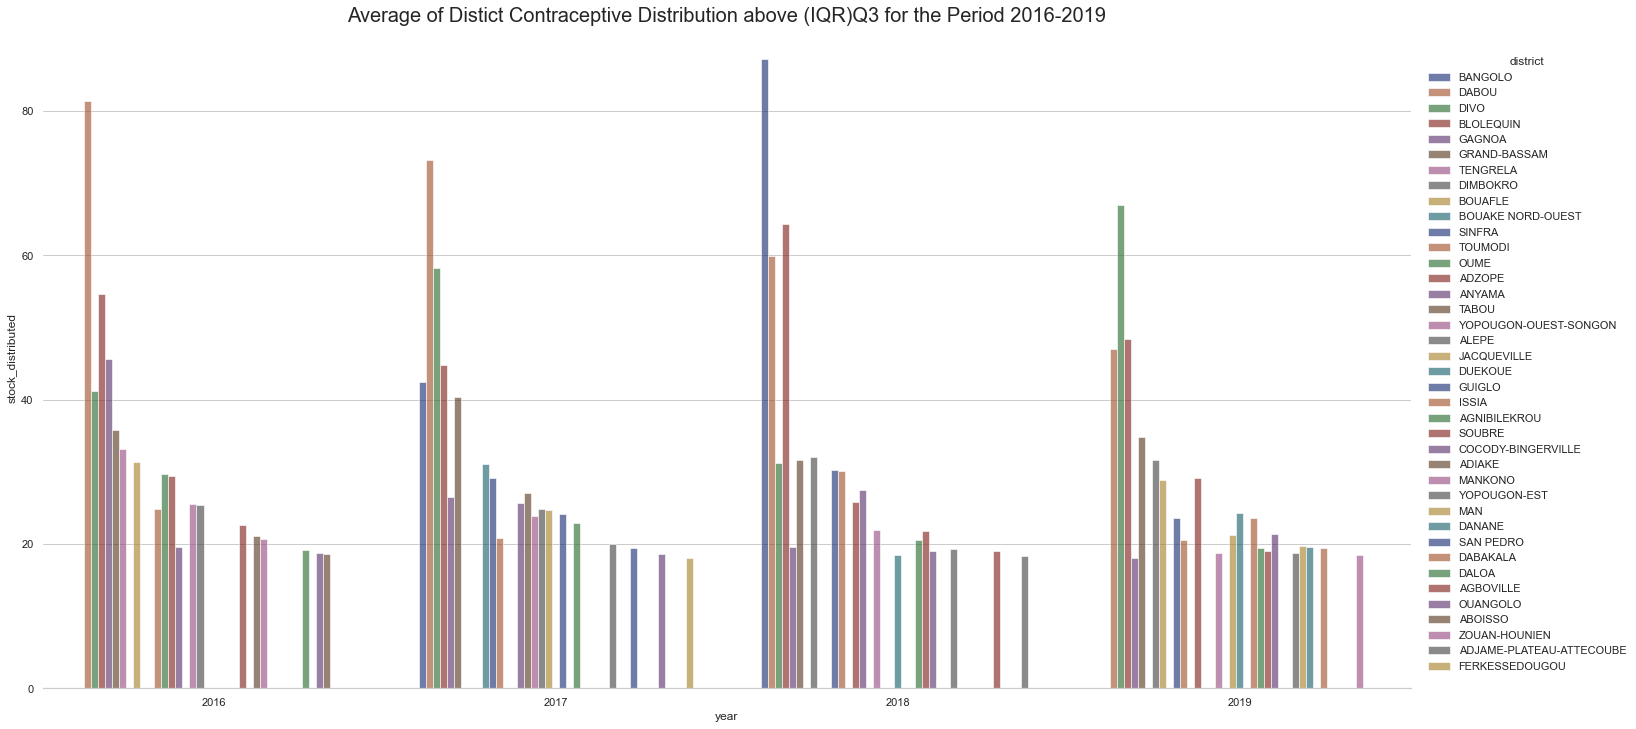

In [17]:
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=df_rank_district_avg[df_rank_district_avg['stock_distributed']
                               > 18], kind="bar",
    x="year", y="stock_distributed", hue="district",
    ci="sd", palette="dark", alpha=.6, height=10, aspect=2
)
g.despine(left=True)
plt.title(
    'Average of Distict Contraceptive Distribution above (IQR)Q3 for the Period 2016-2019', fontsize=20)
plt.show()


### Ranking of District Total Contraceptive Consumption Across the Period(2016-2019)

In [18]:
df_rank_district = df.groupby(['district']).sum().reset_index()[
    ['district', 'stock_distributed']].sort_values(['stock_distributed'], ascending=False)


In [19]:
df_rank_district

,district,stock_distributed
23,COCODY-BINGERVILLE,37476
77,YOPOUGON-OUEST-SONGON,30781
36,GRAND-BASSAM,28599
4,ADJAME-PLATEAU-ATTECOUBE,27139
46,KOUMASSI-PORT BOUET-VRIDI,25598
...,...,...
71,TOULEPLEU,1287
13,BETTIE,1188
62,SIKENSI,682
51,MINIGNAN,333


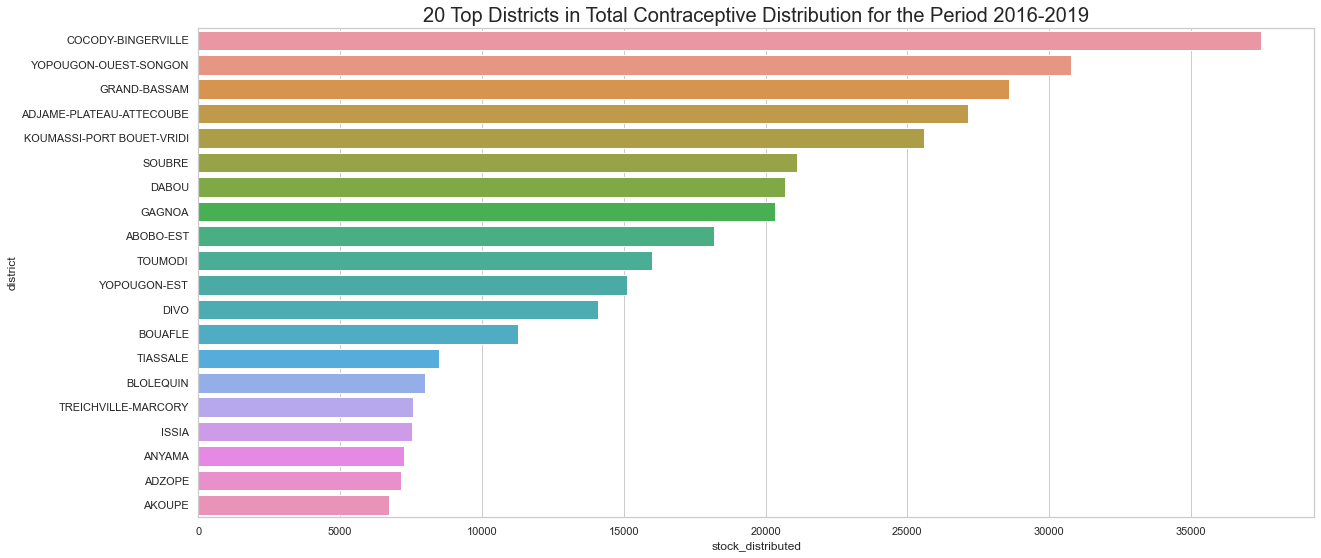

In [20]:
plt.figure(figsize=(20, 9))
sns.set_theme(style="whitegrid")
sns.barplot(data=df_rank_district[:20], orient='h',
            x='stock_distributed', y='district')
plt.title(
    '20 Top Districts in Total Contraceptive Distribution for the Period 2016-2019', fontsize=20)
plt.show()


### Ranking of Site Total Contraceptive Consumption Across the Period(2016-2019)

In [21]:
df_rank_site = df.groupby(['site_code']).sum().reset_index()[
    ['site_code', 'stock_distributed']].sort_values(['stock_distributed'], ascending=False)


In [22]:
df_rank_site

,site_code,stock_distributed
42,C1088,20687
34,C1077,16981
67,C2006,16382
44,C1090,14878
40,C1086,14421
...,...,...
110,C3016,184
26,C1063,159
61,C1701,0
118,C3043,0


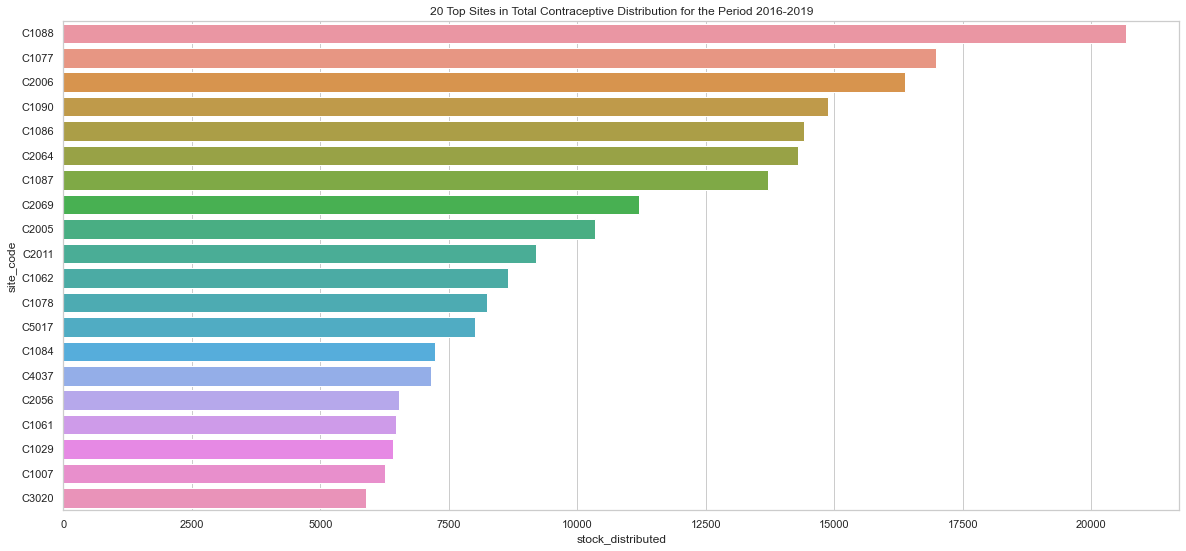

In [23]:
plt.figure(figsize=(20, 9))
sns.set_theme(style="whitegrid")
sns.barplot(data=df_rank_site[:20], orient='h', x='stock_distributed', y='site_code')
plt.title('20 Top Sites in Total Contraceptive Distribution for the Period 2016-2019')
plt.show()


### Monthly Trend of Contraceptive Consumption Across the Period(2016-2019)

In [24]:
df_monthly = df.groupby(['date', 'month', 'product_code']).sum().reset_index()[['date', 'product_code', 'stock_distributed']].pivot(
    index='date', columns='product_code', values='stock_distributed').reset_index()
df_monthly.set_index('date', inplace=True)


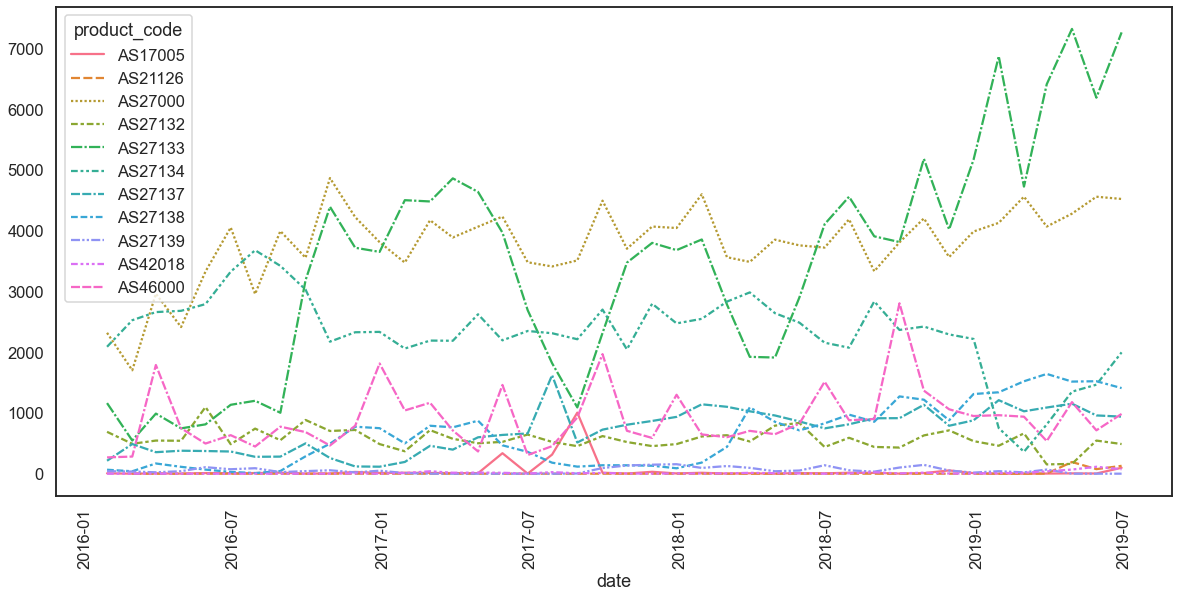

In [25]:
plt.figure(figsize=(20,9))
sns.set_theme(style= 'white', palette='dark', context='talk')
sns.lineplot(data=df_monthly)
plt.xticks(rotation=90)
plt.show()

### Yearly Trend of Contraceptive Cumulative Consumption Across the Period(2016-2019)

In [26]:
df_yearly = df.groupby(['year', 'product_code']).sum().reset_index()[['year', 'product_code', 'stock_distributed']].pivot(
    index='year', columns='product_code', values='stock_distributed').reset_index()
df_yearly.set_index('year', inplace=True)

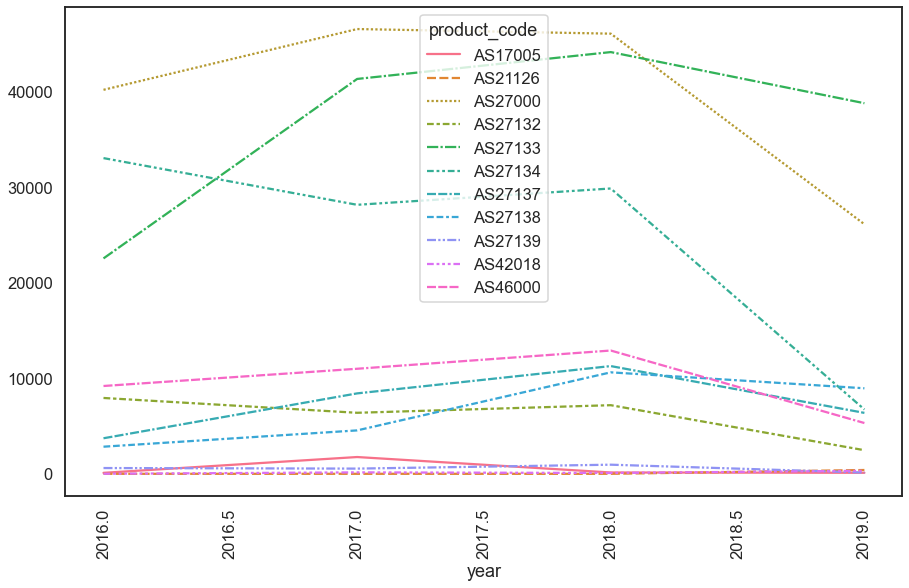

In [27]:
plt.figure(figsize=(15, 9))
sns.set_theme(style='white', palette='dark', context='talk')
sns.lineplot(data=df_yearly)
plt.xticks(rotation=90)
plt.show()


From the two graphs, product AS21126 has data for a couple of months in 2019 and lacks for the rest. Therefore we will drop the site.

### Seasonality Accross Months for Cumulative Contraceptive Consumption Across the Period(2016-2019)

In [28]:
df_m_seasons = df.groupby(['date']).sum().reset_index()[
    ['date', 'stock_distributed']]


In [29]:
#df_m_seasons['month'] = pd.to_datetime(df_m_seasons['month'], format='%m').dt.month_name()


In [30]:
import matplotlib.dates as mdates


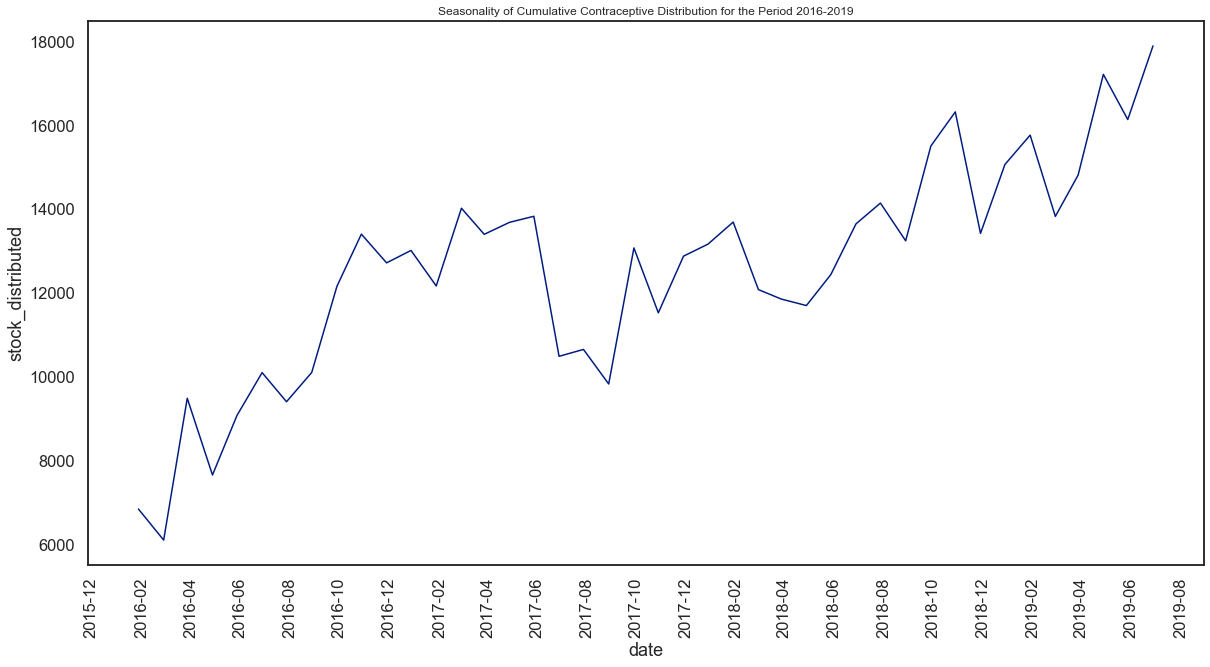

In [31]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1)
sns.set_theme(style="whitegrid")
sns.lineplot(data=df_m_seasons, x='date', y='stock_distributed')
plt.title('Seasonality of Cumulative Contraceptive Distribution for the Period 2016-2019')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.xticks(rotation=90)
plt.show()


### Average Distribution of Contraceptives Per Region Per Year

In [32]:
df_region = df.groupby(['region', 'year']).mean()[['stock_distributed']].reset_index()

In [33]:
df_region

,region,year,stock_distributed
0,ABIDJAN 1-GRANDS PONTS,2016,23.139018
1,ABIDJAN 1-GRANDS PONTS,2017,23.520583
2,ABIDJAN 1-GRANDS PONTS,2018,21.372521
3,ABIDJAN 1-GRANDS PONTS,2019,19.422340
4,ABIDJAN 2,2016,14.543696
...,...,...,...
75,TONKPI,2019,17.051852
76,WORODOUGOU-BERE,2016,9.789474
77,WORODOUGOU-BERE,2017,11.144681
78,WORODOUGOU-BERE,2018,10.651639


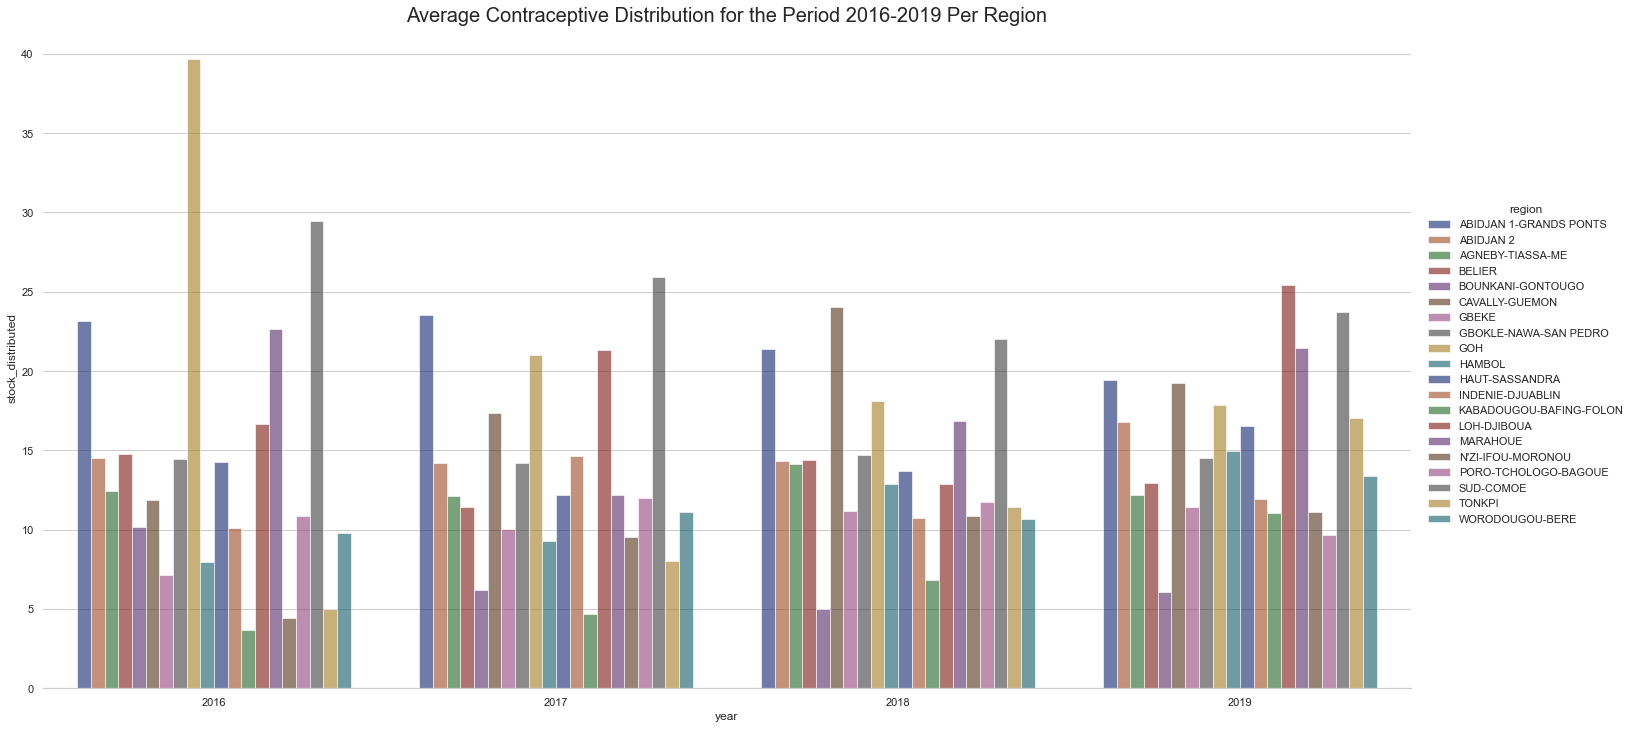

In [34]:
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=df_region, kind="bar",
    x="year", y="stock_distributed", hue="region",
    ci="sd", palette="dark", alpha=.6, height=10, aspect=2
)
g.despine(left=True)
plt.title(
    'Average Contraceptive Distribution for the Period 2016-2019 Per Region', fontsize=20)
plt.show()


### Average Distribution of Contraceptives Per Product

In [35]:
df_product = df.groupby(['product_code', 'year']).mean()[
    ['stock_distributed']].reset_index()


In [36]:
df_product

,product_code,year,stock_distributed
0,AS17005,2016,0.284916
1,AS17005,2017,4.918768
2,AS17005,2018,0.396011
3,AS17005,2019,0.587912
4,AS21126,2016,0.000000
5,AS21126,2018,0.000000
6,AS21126,2019,1.255521
7,AS27000,2016,32.616883
8,AS27000,2017,31.174146
9,AS27000,2018,27.932686


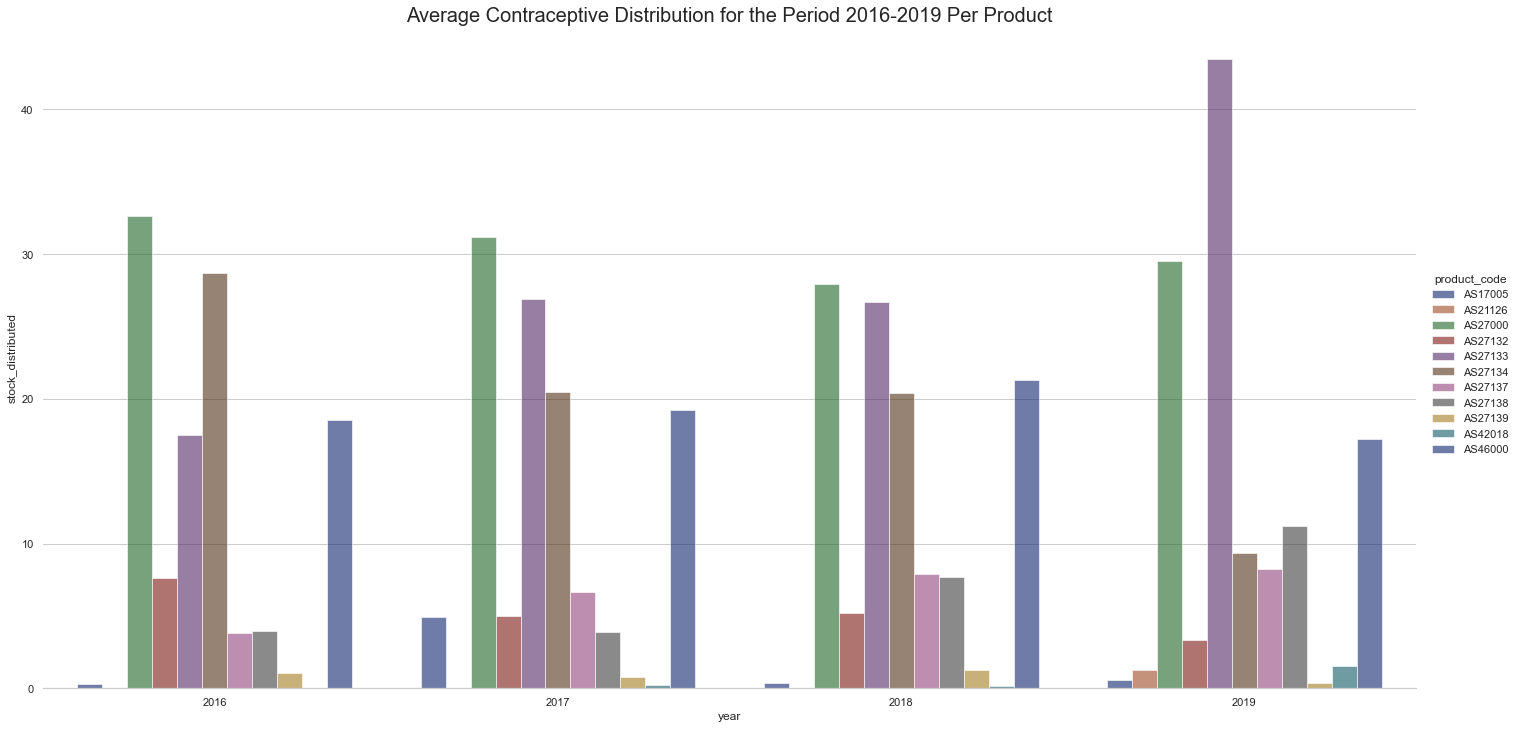

In [37]:
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=df_product, kind="bar",
    x="year", y="stock_distributed", hue="product_code",
    ci="sd", palette="dark", alpha=.6, height=10, aspect=2
)
g.despine(left=True)
plt.title(
    'Average Contraceptive Distribution for the Period 2016-2019 Per Product', fontsize=20)
plt.show()


In [38]:
df

,year,month,region,district,site_code,product_code,stock_initial,stock_received,stock_distributed,stock_adjustment,stock_end,average_monthly_consumption,stock_stockout_days,stock_ordered,date
35279,2016,1,ABIDJAN 1-GRANDS PONTS,YOPOUGON-OUEST-SONGON,C1028,AS46000,0,0,0,0,0,0,0,0.0,2016-01-28
35278,2016,1,ABIDJAN 1-GRANDS PONTS,YOPOUGON-OUEST-SONGON,C1028,AS17005,10,0,0,0,10,0,0,0.0,2016-01-28
35277,2016,1,ABIDJAN 1-GRANDS PONTS,YOPOUGON-OUEST-SONGON,C1028,AS27134,0,0,0,0,0,18,0,0.0,2016-01-28
35276,2016,1,ABIDJAN 1-GRANDS PONTS,YOPOUGON-OUEST-SONGON,C1028,AS27132,45,0,3,0,42,8,0,0.0,2016-01-28
35275,2016,1,ABIDJAN 1-GRANDS PONTS,YOPOUGON-OUEST-SONGON,C1028,AS27000,80,0,9,0,71,33,0,0.0,2016-01-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,2019,6,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27137,18,0,0,0,18,1,0,0.0,2019-06-28
46,2019,6,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27000,19,10,8,0,21,8,0,0.0,2019-06-28
45,2019,6,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27132,4,5,0,0,9,0,0,0.0,2019-06-28
44,2019,6,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27134,67,0,11,0,56,15,0,0.0,2019-06-28


In [39]:
# Removing the rows for the product code with only 2019 data
df_clean = df.drop(df[df['product_code'] == 'AS21126'].index, axis=0)


In [40]:
# Knowing the distribution of value counts of the products across the years
df_clean['product_code'].value_counts()

AS27133    5368
AS27000    5259
AS27134    4708
AS27137    4449
AS27132    4436
AS27138    4060
AS27139    2347
AS46000    1981
AS42018    1550
AS17005    1248
Name: product_code, dtype: int64

In [41]:
df_clean = df_clean.groupby(['date', 'year', 'month', 'site_code', 'product_code']).sum().reset_index()[[
    'date', 'year', 'month', 'site_code', 'product_code', 'stock_distributed']]


In [42]:
def create_df(data: pd.DataFrame):
    dates = data.date.unique()
    sites = data.site_code.unique()
    products = data.product_code.unique()
    missn = pd.DataFrame(
        columns=['date', 'site_code', 'product_code', 'stock_distributed'])

    for date in dates:
        for site in sites:
            temp = data[(data.date == date) & (data.site_code == site)]
            temp_prod = temp.product_code.unique()
            miss = list(set(products).difference(temp_prod))
            if len(miss) > 0:
                for val in miss:
                    missn = missn.append(
                        {'date': date, 'site_code': site, 'product_code': val, 'stock_distributed': 0}, ignore_index=True)

    return missn


With an assumption of the missing data:
1. o(zero) value data was created where certain products were missing for the various sites hence the function create_df

In [43]:
# Creating of x Dataframe holding the data where certain products missed in specific sites
x = create_df(df_clean)

In [44]:
# Merging the original dataframe with the data with certain products missing in specific sites
df_clean = pd.concat([df_clean.reset_index()[
                     ['date', 'site_code', 'product_code', 'stock_distributed']], x])

In [45]:
df_clean.sort_values(['date', 'site_code', 'product_code'],
                     ascending=True, inplace=True)


In [46]:
df_clean.set_index('date', inplace=True)

In [47]:
df_clean.head()

,site_code,product_code,stock_distributed
date,,,
2016-01-28,C1004,AS17005,0
2016-01-28,C1004,AS27000,0
2016-01-28,C1004,AS27132,0
2016-01-28,C1004,AS27133,0
2016-01-28,C1004,AS27134,0


In [48]:
df_clean['product_code'].value_counts()

AS17005    6510
AS27000    6510
AS27132    6510
AS27133    6510
AS27134    6510
AS27137    6510
AS27138    6510
AS27139    6510
AS42018    6510
AS46000    6510
Name: product_code, dtype: int64

The value count distribution is now even accross all products

In [49]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

In [50]:
cat_pipe = Pipeline([
    ('encoder', OrdinalEncoder(handle_unknown='error'))
])

num_pipe = Pipeline([
    ('scaler_1', RobustScaler()),
    ('scaler_2', MinMaxScaler())
])

In [51]:
# Ordinal encoding for the site_code and product_code features
site_pro_trsm = cat_pipe.fit_transform(df_clean.drop(['stock_distributed'], axis=1))

In [52]:
# Appending the transformed site_code and product_code features as new features
df_clean['site'] = site_pro_trsm[:, 0]
df_clean['product'] = site_pro_trsm[:, 1]

In [53]:
# Robust Scaling to remove outliers in the features considering stock_distributed has large outlier figures
all_trsm = num_pipe.fit_transform(df_clean[['site', 'product','stock_distributed']])

In [54]:
# Appending the robust scaled features
df_clean['site'] = all_trsm[:, 0]
df_clean['product'] = all_trsm[:, 1]
df_clean['stock'] = all_trsm[:, 2]

In [55]:
df_clean

,site_code,product_code,stock_distributed,site,product,stock
date,,,,,,
2016-01-28,C1004,AS17005,0,0.0,0.000000,0.000000
2016-01-28,C1004,AS27000,0,0.0,0.111111,0.000000
2016-01-28,C1004,AS27132,0,0.0,0.222222,0.000000
2016-01-28,C1004,AS27133,0,0.0,0.333333,0.000000
2016-01-28,C1004,AS27134,0,0.0,0.444444,0.000000
...,...,...,...,...,...,...
2019-06-28,C5066,AS27137,0,1.0,0.555556,0.000000
2019-06-28,C5066,AS27138,3,1.0,0.666667,0.001736
2019-06-28,C5066,AS27139,0,1.0,0.777778,0.000000


In [56]:
def create_seq(dataset):
    seq = []
    labels = []
    start_idx = 0

    for stop_idx in range(1550, len(dataset)):
        seq.append(dataset.iloc[start_idx:stop_idx][['site', 'product', 'stock']])
        labels.append(dataset['stock'][stop_idx])
        start_idx += 1
    return np.array(seq), np.array(labels)


In [57]:
train_size = round(42*0.80)*1550 #Number of months - 42, Proportion of test size=0.80, # Records per month - 1550

In [58]:
train_data = df_clean[:train_size+1]
test_data = df_clean[train_size+1:]


In [59]:
train_seq, train_label = create_seq(train_data)
test_seq, test_label = create_seq(test_data)


In [60]:
test_seq.shape

(10849, 1550, 3)

#### Storing some Elements for Later Use in Testing

In [61]:
import joblib

In [62]:
data_dic = {'train_seq': train_seq, 'train_label': train_label, 'test_seq': test_seq, 'test_label': test_label}

In [63]:
joblib.dump(data_dic, './elements/procssd_data.joblib')

['./elements/procssd_data.joblib']

In [64]:
joblib.dump(num_pipe, './elements/num_pipe.joblib')

['./elements/num_pipe.joblib']

In [65]:
df_clean.to_csv('./elements/df_clean.csv')

#### Modelling to Forecast

In [61]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, InputLayer, Conv1D, MaxPooling1D

2022-01-24 11:29:14.126606: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-24 11:29:14.126796: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [62]:
model = Sequential()
model.add(InputLayer(input_shape=(None, 3,),
          batch_size=16, name='input_layer'))
model.add(Conv1D(64, kernel_size=2, padding='same',
          activation='relu', name='conv1d_1'))
model.add(MaxPooling1D(1, padding='same', name='maxpool_1'))
model.add(LSTM(units=512, name='lstm_1', return_sequences=True))
model.add(LSTM(units=256, name='lstm_2', return_sequences=False))
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

In [63]:
model.compile(loss='mean_squared_error', optimizer='adam',
              metrics=['mean_absolute_error'])


In [64]:
tf.config.run_functions_eagerly(True)
tf.data.experimental.enable_debug_mode()

In [65]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    "./model.h5", save_best_only=True, monitor='val_mean_absolute_error')
early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    patience=10, restore_best_weights=True)


In [66]:
history = model.fit(train_seq, train_label, epochs=100, validation_data=(test_seq, test_label),
                    callbacks=[checkpoint_cb, early_stopping_cb])


In [68]:
import json
json.dump(history.history, open('./model/history.json', 'w'), indent=4)
